<a href="https://colab.research.google.com/github/vieweghn/EENG-310-Signals-and-Systems/blob/main/FourierActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sympy as sp

Let's build the Fourier Series for the Half-Wave Rectivied Sinusoid from the text.

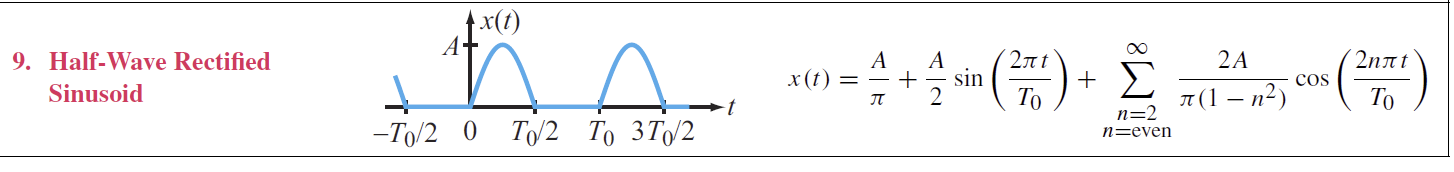

Note the textbook series has $(1-n^2)$ in the denominator. This will be a *negative* number for all $n$ values in the series.

In [2]:
t,T0,A = sp.symbols('t,T0,A', real=True, positive=True)

In [3]:
omega0 = 2*sp.pi/T0
omega0

2*pi/T0

In [4]:
# this is a more general way to define a piecewise function
# it says "f(t) is A*sp.sin(omega0*t) when t<T0/2, and 0 otherwise"

f = sp.Piecewise((A*sp.sin(omega0*t), t < T0/2), (0, True))

In [5]:
c0 = 1/sp.sqrt(T0)*sp.integrate(f,(t,0,T0)) # this is the ket |c0>
c0

A*sqrt(T0)/pi

In [6]:
c1 = sp.sqrt(2/T0)*sp.integrate(sp.cos(omega0*t)*f,(t,0,T0)) # this is the ket |c1>
c1

0

In [7]:
s1 = sp.sqrt(2/T0)*sp.integrate(sp.sin(omega0*t)*f,(t,0,T0)) # this is the ket |s1>
s1 = sp.simplify(s1)
s1

sqrt(2)*A*sqrt(T0)/4

In [8]:
basisFunctions = {} # let's create a collection of kets with labels
for i in range(10):
  if i == 0:
    basisFunctions[f'c{i}'] = sp.sqrt(1/T0)
  else:
    basisFunctions[f'c{i}'] = sp.sqrt(2/T0)*sp.cos(i*omega0*t)
    basisFunctions[f's{i}'] = sp.sqrt(2/T0)*sp.sin(i*omega0*t)

basisFunctions

{'c0': 1/sqrt(T0),
 'c1': sqrt(2)*cos(2*pi*t/T0)/sqrt(T0),
 's1': sqrt(2)*sin(2*pi*t/T0)/sqrt(T0),
 'c2': sqrt(2)*cos(4*pi*t/T0)/sqrt(T0),
 's2': sqrt(2)*sin(4*pi*t/T0)/sqrt(T0),
 'c3': sqrt(2)*cos(6*pi*t/T0)/sqrt(T0),
 's3': sqrt(2)*sin(6*pi*t/T0)/sqrt(T0),
 'c4': sqrt(2)*cos(8*pi*t/T0)/sqrt(T0),
 's4': sqrt(2)*sin(8*pi*t/T0)/sqrt(T0),
 'c5': sqrt(2)*cos(10*pi*t/T0)/sqrt(T0),
 's5': sqrt(2)*sin(10*pi*t/T0)/sqrt(T0),
 'c6': sqrt(2)*cos(12*pi*t/T0)/sqrt(T0),
 's6': sqrt(2)*sin(12*pi*t/T0)/sqrt(T0),
 'c7': sqrt(2)*cos(14*pi*t/T0)/sqrt(T0),
 's7': sqrt(2)*sin(14*pi*t/T0)/sqrt(T0),
 'c8': sqrt(2)*cos(16*pi*t/T0)/sqrt(T0),
 's8': sqrt(2)*sin(16*pi*t/T0)/sqrt(T0),
 'c9': sqrt(2)*cos(18*pi*t/T0)/sqrt(T0),
 's9': sqrt(2)*sin(18*pi*t/T0)/sqrt(T0)}

In [9]:
coefs = {} # now compute the series coefficients
for k in basisFunctions:
  coefs[k] = sp.integrate(basisFunctions[k]*f,(t,0,T0))

coefs

{'c0': A*sqrt(T0)/pi,
 'c1': 0,
 's1': sqrt(2)*A*sqrt(T0)/4,
 'c2': -sqrt(2)*A*sqrt(T0)/(3*pi),
 's2': 0,
 'c3': 0,
 's3': 0,
 'c4': -sqrt(2)*A*sqrt(T0)/(15*pi),
 's4': 0,
 'c5': 0,
 's5': 0,
 'c6': -sqrt(2)*A*sqrt(T0)/(35*pi),
 's6': 0,
 'c7': 0,
 's7': 0,
 'c8': -sqrt(2)*A*sqrt(T0)/(63*pi),
 's8': 0,
 'c9': 0,
 's9': 0}

In [10]:
f_series = basisFunctions['c0']*coefs['c0'] # Now, let's build the series.
for k in basisFunctions:
  if k != 'c0':
    f_series += basisFunctions[k]*coefs[k]

f_series

A*sin(2*pi*t/T0)/2 - 2*A*cos(4*pi*t/T0)/(3*pi) - 2*A*cos(8*pi*t/T0)/(15*pi) - 2*A*cos(12*pi*t/T0)/(35*pi) - 2*A*cos(16*pi*t/T0)/(63*pi) + A/pi

In [11]:
subsVals = {A:1, T0:1} # evaluate with A=1, and T0=1
f_series.subs(subsVals)

sin(2*pi*t)/2 - 2*cos(4*pi*t)/(3*pi) - 2*cos(8*pi*t)/(15*pi) - 2*cos(12*pi*t)/(35*pi) - 2*cos(16*pi*t)/(63*pi) + 1/pi

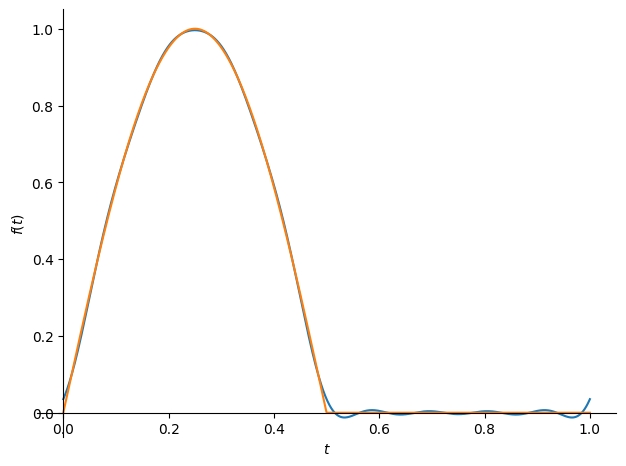

In [12]:
sp.plot(f_series.subs(subsVals),f.subs(subsVals), (t,0,1)) # let's plot it, good!